PROJETO INTEGRADOR IV - Análise de acidentes de trânsito no estado de São Paulo

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Pré processamento

*   Limpeza
*   Transfomação
*   Feature Engineering

 EDA - Análise exploratória dos dados

Seleção do modelo e treinamento do modelo

Validação e avaliação do modelo

In [7]:
df = pd.read_csv('acidentes2024_todas_causas_tipos.csv', encoding = 'latin-1', sep = ';')

In [8]:
df.head()


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

In [10]:
df.columns


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [11]:
df.shape


(343412, 37)

In [12]:
df['classificacao_acidente']


0          Com Vítimas Fatais
1                 Sem Vítimas
2                 Sem Vítimas
3                 Sem Vítimas
4         Com Vítimas Feridas
                 ...         
343407    Com Vítimas Feridas
343408    Com Vítimas Feridas
343409    Com Vítimas Feridas
343410    Com Vítimas Feridas
343411    Com Vítimas Feridas
Name: classificacao_acidente, Length: 343412, dtype: object

In [13]:
df['municipio'].value_counts()


municipio
BRASILIA            5096
CURITIBA            4412
GUARULHOS           4215
SAO JOSE            3804
PORTO VELHO         3058
                    ... 
FRANCISCO SANTOS       1
BARRA DE SANTANA       1
SANTO ANGELO           1
POJUCA                 1
ITAIBA                 1
Name: count, Length: 1727, dtype: int64

In [14]:
df


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343407,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Não,...,Masculino,1.0,0.0,0.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
343408,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Não,...,Feminino,0.0,1.0,0.0,0.0,"-9,58877051","-35,88700493",SPRF-AL,DEL02-AL,UOP01-DEL02-AL
343409,621831.0,1392135.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Não,...,Masculino,0.0,0.0,1.0,0.0,"-9,58877051","-35,88700493",SPRF-AL,DEL02-AL,UOP01-DEL02-AL
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-9,58877051","-35,88700493",SPRF-AL,DEL02-AL,UOP01-DEL02-AL


In [15]:
df['ilesos'].value_counts()


ilesos
0.0    183569
1.0    126319
Name: count, dtype: int64

In [16]:
type(df)


pandas.core.frame.DataFrame

In [17]:
df_pre = df.copy()

In [18]:
df_pre['data_inversa'] =pd.to_datetime(df_pre['data_inversa'])    

In [19]:
df_pre.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      343412 non-null  float64       
 1   pesid                   309888 non-null  float64       
 2   data_inversa            343412 non-null  datetime64[ns]
 3   dia_semana              343412 non-null  object        
 4   horario                 343412 non-null  object        
 5   uf                      343412 non-null  object        
 6   br                      342588 non-null  float64       
 7   km                      342588 non-null  object        
 8   municipio               343412 non-null  object        
 9   causa_principal         343412 non-null  object        
 10  causa_acidente          343412 non-null  object        
 11  ordem_tipo_acidente     343412 non-null  int64         
 12  tipo_acidente           343412

In [20]:
df_pre['km'] = df_pre['km'].str.replace(',','.').astype(float)

In [21]:
df_pre.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      343412 non-null  float64       
 1   pesid                   309888 non-null  float64       
 2   data_inversa            343412 non-null  datetime64[ns]
 3   dia_semana              343412 non-null  object        
 4   horario                 343412 non-null  object        
 5   uf                      343412 non-null  object        
 6   br                      342588 non-null  float64       
 7   km                      342588 non-null  float64       
 8   municipio               343412 non-null  object        
 9   causa_principal         343412 non-null  object        
 10  causa_acidente          343412 non-null  object        
 11  ordem_tipo_acidente     343412 non-null  int64         
 12  tipo_acidente           343412

In [22]:
df_pre.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      343412 non-null  float64       
 1   pesid                   309888 non-null  float64       
 2   data_inversa            343412 non-null  datetime64[ns]
 3   dia_semana              343412 non-null  object        
 4   horario                 343412 non-null  object        
 5   uf                      343412 non-null  object        
 6   br                      342588 non-null  float64       
 7   km                      342588 non-null  float64       
 8   municipio               343412 non-null  object        
 9   causa_principal         343412 non-null  object        
 10  causa_acidente          343412 non-null  object        
 11  ordem_tipo_acidente     343412 non-null  int64         
 12  tipo_acidente           343412

In [23]:
df_pre['idade']






0         26.0
1         34.0
2         34.0
3         55.0
4         53.0
          ... 
343407     NaN
343408    34.0
343409    38.0
343410    34.0
343411    38.0
Name: idade, Length: 343412, dtype: float64

In [24]:
df_pre.nunique()


id                         41547
pesid                     101504
data_inversa                 213
dia_semana                     7
horario                     1356
uf                            27
br                           109
km                          6583
municipio                   1727
causa_principal                2
causa_acidente                70
ordem_tipo_acidente           10
tipo_acidente                 17
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica         9
tipo_pista                     3
tracado_via                  495
uso_solo                       2
id_veiculo                 79552
tipo_veiculo                  25
marca                       6061
ano_fabricacao_veiculo        68
tipo_envolvido                 5
estado_fisico                  5
idade                        117
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_gr

In [25]:
df_pre.isnull().sum()

id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_graves            33524
mortos  

In [26]:
df_pre[df_pre.ilesos.isnull()]


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
82,571789.0,NaN,2024-01-01,segunda-feira,03:56:00,ES,101.0,38.0,CONCEICAO DA BARRA,Sim,...,NaN,NaN,NaN,NaN,NaN,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
199,571806.0,NaN,2024-01-01,segunda-feira,04:30:00,BA,116.0,578.0,BREJOES,Sim,...,NaN,NaN,NaN,NaN,NaN,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
200,571806.0,NaN,2024-01-01,segunda-feira,04:30:00,BA,116.0,578.0,BREJOES,Sim,...,NaN,NaN,NaN,NaN,NaN,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
273,571818.0,NaN,2024-01-01,segunda-feira,06:30:00,SE,101.0,18.0,MALHADA DOS BOIS,Sim,...,NaN,NaN,NaN,NaN,NaN,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
274,571818.0,NaN,2024-01-01,segunda-feira,06:30:00,SE,101.0,18.0,MALHADA DOS BOIS,Sim,...,NaN,NaN,NaN,NaN,NaN,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343346,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Não,...,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
343352,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Não,...,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
343358,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Sim,...,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
343364,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Não,...,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP


In [27]:
df_pre.idade.describe()

count    280129.000000
mean         39.947696
std          41.979165
min           0.000000
25%          27.000000
50%          38.000000
75%          49.000000
max        2023.000000
Name: idade, dtype: float64

<Axes: >

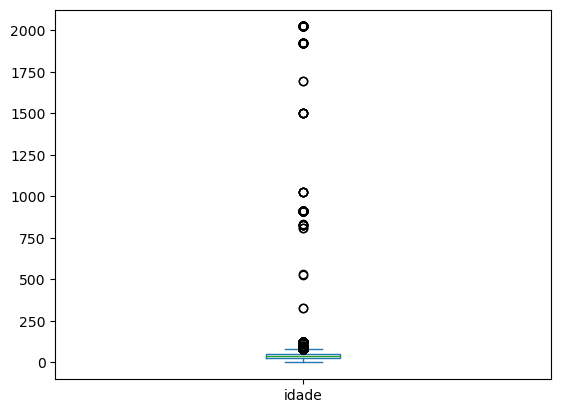

In [28]:
df_pre.idade.plot.box()

<Axes: >

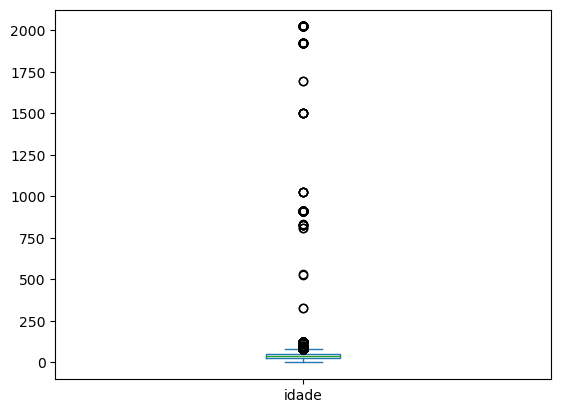

In [29]:
df.idade.plot.box()

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

<Axes: >

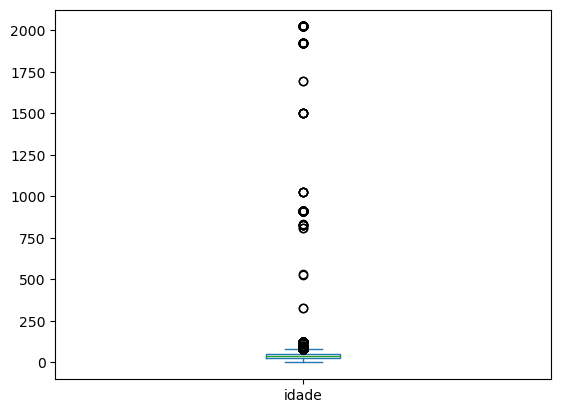

In [31]:
df.idade.plot.box()

In [32]:
df.columns


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [33]:
df[df.idade.isnull()]



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
27,571782.0,1270940.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-20,782074","-51,65705",SPRF-MS,DEL07-MS,UOP01-DEL07-MS
29,571782.0,1270940.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-20,782074","-51,65705",SPRF-MS,DEL07-MS,UOP01-DEL07-MS
50,571787.0,1268990.0,2024-01-01,segunda-feira,02:20:00,RS,116.0,242,SAO LEOPOLDO,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-29,72297087","-51,14858729",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
82,571789.0,NaN,2024-01-01,segunda-feira,03:56:00,ES,101.0,38,CONCEICAO DA BARRA,Sim,...,NaN,NaN,NaN,NaN,NaN,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
86,571790.0,1271025.0,2024-01-01,segunda-feira,02:50:00,SP,101.0,41,UBATUBA,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-23,41971433","-45,0428663",SPRF-SP,DEL06-SP,UOP01-DEL06-SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343387,621766.0,1392064.0,2024-07-28,domingo,09:30:00,PR,116.0,111,CURITIBA,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-25,5579687","-49,268367",SPRF-PR,DEL01-PR,UOP07-DEL01-PR
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Sim,...,Feminino,0.0,0.0,1.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
343406,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Não,...,Feminino,0.0,0.0,1.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

In [35]:
df.uf


0         RJ
1         GO
2         GO
3         ES
4         SC
          ..
343407    SC
343408    AL
343409    AL
343410    AL
343411    AL
Name: uf, Length: 343412, dtype: object

In [36]:
print(df)


              id      pesid data_inversa     dia_semana   horario  uf     br  \
0       571772.0  1268971.0   2024-01-01  segunda-feira  00:05:00  RJ  101.0   
1       571774.0  1268985.0   2024-01-01  segunda-feira  00:05:00  GO  153.0   
2       571774.0  1268985.0   2024-01-01  segunda-feira  00:05:00  GO  153.0   
3       571777.0  1269020.0   2024-01-01  segunda-feira  01:45:00  ES  101.0   
4       571778.0  1269028.0   2024-01-01  segunda-feira  00:45:00  SC  101.0   
...          ...        ...          ...            ...       ...  ..    ...   
343407  621812.0  1392084.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   
343408  621831.0  1392136.0   2024-07-28        domingo  11:30:00  AL  316.0   
343409  621831.0  1392135.0   2024-07-28        domingo  11:30:00  AL  316.0   
343410  621831.0  1392136.0   2024-07-28        domingo  11:30:00  AL  316.0   
343411  621831.0  1392135.0   2024-07-28        domingo  11:30:00  AL  316.0   

           km municipio causa_principal

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

In [38]:
df.head()



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [39]:
df.describe(include = 'all')

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
count,343412.000000,3.098880e+05,343412,343412,343412,343412,342588.000000,342588,343412,343412,...,309888,309888.000000,309888.000000,309888.000000,309888.000000,343412,343412,343409,343336,343227
unique,NaN,NaN,213,7,1356,27,NaN,6583,1727,2,...,4,NaN,NaN,NaN,NaN,24461,24455,28,152,392
top,NaN,NaN,2024-07-21,domingo,19:00:00,MG,NaN,5,BRASILIA,Sim,...,Masculino,NaN,NaN,NaN,NaN,"-23,01910606","-54,30128306",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,NaN,NaN,3200,57066,5298,44187,NaN,1466,5096,195461,...,214593,NaN,NaN,NaN,NaN,960,960,44016,16407,5462
mean,595677.616076,1.327972e+06,NaN,NaN,NaN,NaN,216.686641,NaN,NaN,NaN,...,NaN,0.407628,0.345957,0.127801,0.052287,NaN,NaN,NaN,NaN,NaN
std,13688.428005,3.328831e+04,NaN,NaN,NaN,NaN,126.744896,NaN,NaN,NaN,...,NaN,0.491394,0.475680,0.333869,0.222605,NaN,NaN,NaN,NaN,NaN
min,571772.000000,1.268971e+06,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,583348.000000,1.298572e+06,NaN,NaN,NaN,NaN,116.000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,596061.000000,1.328496e+06,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,607592.000000,1.356871e+06,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,NaN,...,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [40]:
df.isnull().sum()

id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_graves            33524
mortos  

In [41]:
df.columns


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [42]:
df['idade']

0         26.0
1         34.0
2         34.0
3         55.0
4         53.0
          ... 
343407     NaN
343408    34.0
343409    38.0
343410    34.0
343411    38.0
Name: idade, Length: 343412, dtype: float64

In [43]:
df['idade'].value_counts().tail(50)

idade
6.0       768
4.0       700
10.0      693
5.0       683
1.0       662
3.0       661
75.0      614
2.0       586
76.0      579
77.0      475
78.0      383
79.0      303
81.0      241
80.0      241
82.0      217
84.0      184
83.0      155
0.0       141
85.0      129
124.0     125
87.0      106
86.0       89
913.0      81
2023.0     58
90.0       55
89.0       45
88.0       40
1923.0     29
94.0       27
93.0       22
91.0       18
92.0        9
95.0        9
1505.0      6
96.0        6
830.0       6
1024.0      5
123.0       3
97.0        3
1692.0      2
812.0       2
1924.0      1
833.0       1
328.0       1
524.0       1
102.0       1
330.0       1
530.0       1
99.0        1
114.0       1
Name: count, dtype: int64

In [44]:
df.isna().sum()

id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_graves            33524
mortos  

In [45]:
df.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_grav

In [46]:
df.head(8)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
5,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Feminino,0.0,1.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [47]:
#Percebi que o dataframe apresenta dados duplicados, por conta de apresentar mais de uma causa do acidente. 
#A causa principal é classificada como "SIM" e a secundária, coomo "NÃO
#Optei por deixar apenas a causa principal e, em seguida, eliminei esta coluna.
data = df[df['causa_principal'] != 'Não']

In [48]:
data.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
16,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-25,54112281","-49,06183391",SPRF-PR,DEL01-PR,UOP01-DEL01-PR


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195461 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      195461 non-null  float64
 1   pesid                   177438 non-null  float64
 2   data_inversa            195461 non-null  object 
 3   dia_semana              195461 non-null  object 
 4   horario                 195461 non-null  object 
 5   uf                      195461 non-null  object 
 6   br                      195018 non-null  float64
 7   km                      195018 non-null  object 
 8   municipio               195461 non-null  object 
 9   causa_principal         195461 non-null  object 
 10  causa_acidente          195461 non-null  object 
 11  ordem_tipo_acidente     195461 non-null  int64  
 12  tipo_acidente           195461 non-null  object 
 13  classificacao_acidente  195458 non-null  object 
 14  fase_dia                1

In [50]:
data.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          443
km                          443
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 6042
tipo_veiculo               6042
marca                         0
ano_fabricacao_veiculo     6042
tipo_envolvido            18023
estado_fisico             18023
idade                     34882
sexo                      18023
ilesos                    18023
feridos_leves             18023
feridos_grav

In [51]:
#Exclui as coluna que não acho importante para a análise que vamos fazer
data.drop(['causa_principal', 'ano_fabricacao_veiculo', 'feridos_leves', 'feridos_graves','mortos', 'regional', 'delegacia', 'uop'], axis = 1, inplace = True)

C:\Users\leand\AppData\Local\Temp\ipykernel_11124\2831587860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['causa_principal', 'ano_fabricacao_veiculo', 'feridos_leves', 'feridos_graves','mortos', 'regional', 'delegacia', 'uop'], axis = 1, inplace = True)


In [52]:
#Percebi que os dados faltantes estavam diretamente relacionados a testemunhas, inclusas no dados.
#Acredito que essa informação não seja tão relevante para a nossa análise de dados.
data1 = data[data['tipo_envolvido'] != 'Testemunha']

In [53]:
data1.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          432
km                          432
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido            18023
estado_fisico             18023
idade                     31462
sexo                      18023
ilesos                    18023
latitude                      0
longitude                     0
dtype: int64>

In [54]:
data1.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,ilesos,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,...,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,0.0,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,...,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,1.0,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,...,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,1.0,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,...,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,1.0,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,...,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,0.0,"-26,83477","-48,706151"
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,6.0,Feminino,1.0,"-29,66938502","-51,14304731"
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,9.0,Masculino,1.0,"-29,66938502","-51,14304731"
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,13.0,Feminino,1.0,"-29,66938502","-51,14304731"
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino,1.0,"-29,66938502","-51,14304731"
16,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,0.0,"-25,54112281","-49,06183391"


In [55]:
data1.drop('ilesos', axis = 1, inplace = True)

C:\Users\leand\AppData\Local\Temp\ipykernel_11124\915510698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('ilesos', axis = 1, inplace = True)


In [56]:
data1.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          432
km                          432
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido            18023
estado_fisico             18023
idade                     31462
sexo                      18023
latitude                      0
longitude                     0
dtype: int64>

In [57]:
linha = data1[data1.isnull().any(axis=1)]

In [58]:
print(linha)

              id      pesid data_inversa     dia_semana   horario  uf     br  \
50      571787.0  1268990.0   2024-01-01  segunda-feira  02:20:00  RS  116.0   
51      571787.0  1268989.0   2024-01-01  segunda-feira  02:20:00  RS  116.0   
82      571789.0        NaN   2024-01-01  segunda-feira  03:56:00  ES  101.0   
83      571789.0  1269011.0   2024-01-01  segunda-feira  03:56:00  ES  101.0   
84      571789.0  1271676.0   2024-01-01  segunda-feira  03:56:00  ES  101.0   
...          ...        ...          ...            ...       ...  ..    ...   
343383  621766.0  1391974.0   2024-07-28        domingo  09:30:00  PR  116.0   
343385  621766.0  1392065.0   2024-07-28        domingo  09:30:00  PR  116.0   
343386  621766.0  1391974.0   2024-07-28        domingo  09:30:00  PR  116.0   
343404  621812.0  1392087.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   
343405  621812.0  1392084.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   

          km           municipio       

In [59]:
data1['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            66328
Motocicleta          41139
Semireboque          16000
Caminhonete          15551
Caminhão-trator      13498
Caminhão             10948
Ônibus                7350
Camioneta             4918
Motoneta              4393
Utilitário            3146
Bicicleta             2104
Reboque               1752
Micro-ônibus          1320
Ciclomotor             418
Outros                 358
Trator de rodas         74
Carroça-charrete        59
Triciclo                21
Motor-casa              18
Trator de esteira        9
Quadriciclo              4
Trem-bonde               3
Trator misto             3
Carro de mão             3
Chassi-plataforma        2
Name: count, dtype: int64

In [60]:
#Percebi que os dados faltantes estavam diretamente relacionados a semireboque (dados referente ao caminhão-trator envolvido no acidente), inclusas no dados.
#Acredito que essa informação não seja tão relevante para a nossa análise de dados.
data2 = data1[data1['tipo_veiculo'] != 'Semireboque']

In [61]:
data1.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          432
km                          432
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido            18023
estado_fisico             18023
idade                     31462
sexo                      18023
latitude                      0
longitude                     0
dtype: int64>

In [62]:
data2['tipo_veiculo']

0         Motocicleta
2           Automóvel
3         Caminhonete
6           Camioneta
7           Camioneta
             ...     
343403    Motocicleta
343404    Motocicleta
343405      Automóvel
343410    Motocicleta
343411    Motocicleta
Name: tipo_veiculo, Length: 176041, dtype: object

In [63]:
data2.loc[385:420]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
385,571838.0,1269159.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018348.0,Caminhão,SCANIA/P 310 B8X2,Condutor,Ileso,57.0,Masculino,"-16,17914141","-54,78905337"
386,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
387,571838.0,1269158.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018347.0,Automóvel,VW/GOL 1.0,Condutor,Ileso,23.0,Masculino,"-16,17914141","-54,78905337"
391,571838.0,1269159.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018348.0,Caminhão,SCANIA/P 310 B8X2,Condutor,Ileso,57.0,Masculino,"-16,17914141","-54,78905337"
392,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
393,571838.0,1269158.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018347.0,Automóvel,VW/GOL 1.0,Condutor,Ileso,23.0,Masculino,"-16,17914141","-54,78905337"
396,571839.0,1269152.0,2024-01-01,segunda-feira,09:15:00,MG,381.0,521,BRUMADINHO,Velocidade Incompatível,...,Não,1018345.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,32.0,Masculino,"-20,13846621","-44,31715274"
399,571839.0,1269152.0,2024-01-01,segunda-feira,09:15:00,MG,381.0,521,BRUMADINHO,Velocidade Incompatível,...,Não,1018345.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,32.0,Masculino,"-20,13846621","-44,31715274"
400,571841.0,1269091.0,2024-01-01,segunda-feira,08:50:00,CE,304.0,"50,7",ARACATI,Chuva,...,Não,1018307.0,Utilitário,CHEV/TRAILBLAZER PRE D4A,Condutor,Lesões Leves,53.0,Masculino,"-4,57352926","-37,76245988"
401,571842.0,1269097.0,2024-01-01,segunda-feira,05:20:00,TO,153.0,789,TALISMA,Reação tardia ou ineficiente do condutor,...,Não,1018310.0,Automóvel,I/CHEVROLET CLASSIC LS,Condutor,Ileso,31.0,Feminino,"-12,71914102","-49,07691189"


In [64]:
data2.loc[data2['tipo_veiculo'] == 'Reboque']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
386,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
392,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,...,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
968,571922.0,NaN,2024-01-01,segunda-feira,15:30:00,MG,251.0,"459,7",GRAO MOGOL,Condutor Dormindo,...,Não,1018496.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-16,41473399","-43,368613"
1977,572060.0,NaN,2024-01-01,segunda-feira,17:30:00,BA,242.0,366,PALMEIRAS,Velocidade Incompatível,...,Não,1019881.0,Reboque,REB/LENCOIS RRTC,NaN,NaN,NaN,NaN,"-12,46767097","-41,43877801"
1985,572060.0,NaN,2024-01-01,segunda-feira,17:30:00,BA,242.0,366,PALMEIRAS,Velocidade Incompatível,...,Não,1019881.0,Reboque,REB/LENCOIS RRTC,NaN,NaN,NaN,NaN,"-12,46767097","-41,43877801"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342572,620513.0,NaN,2024-07-30,terça-feira,12:50:00,SP,381.0,"41,5",ATIBAIA,Demais falhas mecânicas ou elétricas,...,Sim,1111935.0,Reboque,R/ISIDOC CIA 1502,NaN,NaN,NaN,NaN,"-23,13863999","-46,57584088"
342715,620852.0,NaN,2024-07-11,quinta-feira,07:05:00,MA,10.0,"256,6",IMPERATRIZ,Acessar a via sem observar a presença dos outr...,...,Sim,1112587.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-5,499715","-47,471836"
342733,620852.0,NaN,2024-07-11,quinta-feira,07:05:00,MA,10.0,"256,6",IMPERATRIZ,Acessar a via sem observar a presença dos outr...,...,Sim,1112587.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-5,499715","-47,471836"
342751,620852.0,NaN,2024-07-11,quinta-feira,07:05:00,MA,10.0,"256,6",IMPERATRIZ,Acessar a via sem observar a presença dos outr...,...,Sim,1112587.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-5,499715","-47,471836"


In [65]:
#Percebi que os dados faltantes estavam diretamente relacionados a reboque (dados referente ao caminhão envolvido no acidente), inclusas no dados.
#Acredito que essa informação não seja tão relevante para a nossa análise de dados.
data3 = data2[data2['tipo_veiculo'] != 'Reboque']

In [66]:
data3.isna().sum().sum

<bound method Series.sum of id                            0
pesid                       376
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          417
km                          417
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        2
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido              376
estado_fisico               376
idade                     13746
sexo                        376
latitude                      0
longitude                     0
dtype: int64>

In [67]:
data3['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            66328
Motocicleta          41139
Caminhonete          15551
Caminhão-trator      13498
Caminhão             10948
Ônibus                7350
Camioneta             4918
Motoneta              4393
Utilitário            3146
Bicicleta             2104
Micro-ônibus          1320
Ciclomotor             418
Outros                 358
Trator de rodas         74
Carroça-charrete        59
Triciclo                21
Motor-casa              18
Trator de esteira        9
Quadriciclo              4
Trem-bonde               3
Trator misto             3
Carro de mão             3
Chassi-plataforma        2
Name: count, dtype: int64

In [68]:
data3.loc[data2['tipo_veiculo'] == 'Outros']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
2173,572083.0,1270836.0,2024-01-02,terça-feira,09:01:00,PE,104.0,"82,7",AGRESTINA,Reação tardia ou ineficiente do condutor,...,Não,1019422.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-8,414513","-35,967102"
4823,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,...,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
4825,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,...,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
6930,572702.0,1273339.0,2024-01-05,sexta-feira,07:40:00,ES,101.0,"278,9",SERRA,Reação tardia ou ineficiente do condutor,...,Não,1021098.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-20,21698365","-40,32974606"
10644,573223.0,1272963.0,2024-01-07,domingo,19:40:00,PA,230.0,107,SAO JOAO DO ARAGUAIA,Reação tardia ou ineficiente do condutor,...,Não,1020865.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-5,42984186","-48,93289947"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337887,617760.0,1383919.0,2024-07-29,segunda-feira,19:00:00,RJ,356.0,127,CAMPOS DOS GOYTACAZES,Pedestre andava na pista,...,Não,1106604.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-21,67225879","-41,36006689"
338714,617882.0,1382630.0,2024-07-30,terça-feira,12:40:00,MS,158.0,277,TRES LAGOAS,Ausência de reação do condutor,...,Sim,1106884.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-20,81991691","-51,70965204"
341566,618261.0,1383321.0,2024-07-17,quarta-feira,22:15:00,SC,101.0,"12,4",GARUVA,Ausência de reação do condutor,...,Não,1107550.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-26,08104399","-48,86175612"
341574,618261.0,1383321.0,2024-07-17,quarta-feira,22:15:00,SC,101.0,"12,4",GARUVA,Ausência de reação do condutor,...,Não,1107550.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-26,08104399","-48,86175612"


In [69]:
data2.loc[4823:4835]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
4823,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,...,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
4824,572416.0,1270842.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,...,Não,1019426.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Lesões Leves,41.0,Feminino,"-16,252738","-47,900437"
4825,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,...,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
4826,572416.0,1270842.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,...,Não,1019426.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Lesões Leves,41.0,Feminino,"-16,252738","-47,900437"


In [70]:
data3.loc[data2['tipo_veiculo'] == 'Utilitário']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
400,571841.0,1269091.0,2024-01-01,segunda-feira,08:50:00,CE,304.0,"50,7",ARACATI,Chuva,...,Não,1018307.0,Utilitário,CHEV/TRAILBLAZER PRE D4A,Condutor,Lesões Leves,53.0,Masculino,"-4,57352926","-37,76245988"
451,571851.0,1269164.0,2024-01-01,segunda-feira,11:00:00,PE,101.0,58,RECIFE,Acesso irregular,...,Sim,1018334.0,Utilitário,I/TOYOTA HILUX SWSRXA4FD,Condutor,Ileso,28.0,Masculino,"-7,97063209","-34,92064675"
488,571858.0,1269175.0,2024-01-01,segunda-feira,10:55:00,SC,101.0,113,ITAJAI,Condutor deixou de manter distância do veículo...,...,Não,1018364.0,Utilitário,I/MMC PAJERO HPE 3.2 D,Condutor,Ileso,36.0,Masculino,"-26,85311393","-48,72689927"
682,571882.0,1269245.0,2024-01-01,segunda-feira,12:50:00,MG,381.0,"453,8",SABARA,Ausência de reação do condutor,...,Sim,1018408.0,Utilitário,I/SUZUKI G.VITARA 2WD 5P,Condutor,Ileso,63.0,Masculino,"-19,84161029","-43,86768401"
1415,571978.0,1269473.0,2024-01-01,segunda-feira,20:00:00,SP,116.0,230,SAO PAULO,Trafegar com motocicleta (ou similar) entre as...,...,Sim,1018555.0,Utilitário,MMC/ECLIPSE CR HPES,Condutor,Ileso,77.0,Masculino,"-23,52251783","-46,5855702"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342600,620760.0,1389374.0,2024-06-27,quinta-feira,18:15:00,PI,NaN,NaN,SAO JOAO DO PIAUI,Animais na Pista,...,Não,1112354.0,Utilitário,CHEV/TRAILBLAZER LT D4A,Condutor,Ileso,45.0,Masculino,"-8,26381651","-42,4092865"
343178,621327.0,1390919.0,2024-05-31,sexta-feira,12:15:00,RJ,101.0,"479,9",ANGRA DOS REIS,Acessar a via sem observar a presença dos outr...,...,Não,1113637.0,Utilitário,I/LR R.ROVER SPORT TDV6,Condutor,Ileso,23.0,Feminino,"-23,01098576","-44,27880948"
343211,621506.0,1391380.0,2024-04-08,segunda-feira,12:30:00,PR,376.0,"176,3",MARINGA,Acessar a via sem observar a presença dos outr...,...,Sim,1113996.0,Utilitário,I/MMC OUTLANDER 2.0 HPE,Condutor,Não Informado,NaN,Não Informado,"-23,41269173","-51,93158327"
343213,621506.0,1391380.0,2024-04-08,segunda-feira,12:30:00,PR,376.0,"176,3",MARINGA,Acessar a via sem observar a presença dos outr...,...,Sim,1113996.0,Utilitário,I/MMC OUTLANDER 2.0 HPE,Condutor,Não Informado,NaN,Não Informado,"-23,41269173","-51,93158327"


In [71]:
data3.loc[data2['idade'] > 100]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
325,571827.0,1269078.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,...,Não,1018294.0,Automóvel,FIAT/UNO MILLE WAY ECON,Passageiro,Lesões Leves,2023.0,Masculino,"-21,715032","-41,130438"
1738,572029.0,1269675.0,2024-01-02,terça-feira,03:30:00,GO,153.0,356,JARAGUA,Ausência de reação do condutor,...,Sim,1018672.0,Automóvel,HONDA/CITY DX FLEX,Passageiro,Lesões Leves,1923.0,Masculino,"-15,716531","-49,329445"
2088,572077.0,1269715.0,2024-01-02,terça-feira,08:30:00,AL,104.0,93,RIO LARGO,Área urbana sem a presença de local apropriado...,...,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Leves,830.0,Masculino,"-9,52891696","-35,79807693"
2098,572077.0,1269715.0,2024-01-02,terça-feira,08:30:00,AL,104.0,93,RIO LARGO,Área urbana sem a presença de local apropriado...,...,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Leves,830.0,Masculino,"-9,52891696","-35,79807693"
2108,572077.0,1269715.0,2024-01-02,terça-feira,08:30:00,AL,104.0,93,RIO LARGO,Área urbana sem a presença de local apropriado...,...,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Leves,830.0,Masculino,"-9,52891696","-35,79807693"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317474,615399.0,1376500.0,2024-07-19,sexta-feira,04:15:00,BA,101.0,"825,2",PRADO,Velocidade Incompatível,...,Não,1101785.0,Micro-ônibus,RENAULT/MASTER MBUS L3H2,Passageiro,Lesões Leves,2023.0,Masculino,"-17,149908","-39,567032"
320726,615855.0,1376923.0,2024-07-20,sábado,23:30:00,BA,116.0,595,NOVA ITARANA,Trafegar com motocicleta (ou similar) entre as...,...,Não,1102663.0,Motocicleta,HONDA/CG150 START,Passageiro,Lesões Leves,812.0,Masculino,"-13,17351892","-39,99933014"
320727,615855.0,1376922.0,2024-07-20,sábado,23:30:00,BA,116.0,595,NOVA ITARANA,Trafegar com motocicleta (ou similar) entre as...,...,Não,1102663.0,Motocicleta,HONDA/CG150 START,Condutor,Lesões Leves,812.0,Masculino,"-13,17351892","-39,99933014"
323365,616033.0,1377471.0,2024-07-21,domingo,17:40:00,AL,316.0,"250,6",ATALAIA,Ingestão de álcool pelo condutor,...,Não,1103017.0,Motoneta,I/WUYANG WY48Q-2,Condutor,Lesões Leves,2023.0,Masculino,"-9,55605726","-35,97591943"


In [72]:
data3.loc[320:330]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
320,571826.0,1269374.0,2024-01-01,segunda-feira,08:00:00,PR,376.0,617,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,Sim,1018484.0,Motocicleta,HONDA/CG 160 START,Passageiro,Lesões Graves,21.0,Feminino,"-25,58426494","-49,17618795"
321,571826.0,1270996.0,2024-01-01,segunda-feira,08:00:00,PR,376.0,617,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,Sim,1018483.0,Automóvel,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-25,58426494","-49,17618795"
325,571827.0,1269078.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,...,Não,1018294.0,Automóvel,FIAT/UNO MILLE WAY ECON,Passageiro,Lesões Leves,2023.0,Masculino,"-21,715032","-41,130438"
326,571827.0,1269077.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,...,Não,1018294.0,Automóvel,FIAT/UNO MILLE WAY ECON,Condutor,Lesões Leves,31.0,Masculino,"-21,715032","-41,130438"
327,571827.0,1269080.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,...,Não,1018295.0,Automóvel,NISSAN/VERSA 16 SV,Condutor,Ileso,22.0,Masculino,"-21,715032","-41,130438"
330,571828.0,1269070.0,2024-01-01,segunda-feira,06:20:00,PR,373.0,273,PRUDENTOPOLIS,Ingestão de álcool pelo condutor,...,Não,1018285.0,Motocicleta,HONDA/CG 150 TITAN EX,Passageiro,Lesões Leves,19.0,Feminino,"-25,24741013","-51,05082693"


In [73]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174289 entries, 0 to 343411
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      174289 non-null  float64
 1   pesid                   173913 non-null  float64
 2   data_inversa            174289 non-null  object 
 3   dia_semana              174289 non-null  object 
 4   horario                 174289 non-null  object 
 5   uf                      174289 non-null  object 
 6   br                      173872 non-null  float64
 7   km                      173872 non-null  object 
 8   municipio               174289 non-null  object 
 9   causa_acidente          174289 non-null  object 
 10  ordem_tipo_acidente     174289 non-null  int64  
 11  tipo_acidente           174289 non-null  object 
 12  classificacao_acidente  174287 non-null  object 
 13  fase_dia                174289 non-null  object 
 14  sentido_via             1

In [74]:
data3.loc[8:11]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,6.0,Feminino,"-29,66938502","-51,14304731"
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,9.0,Masculino,"-29,66938502","-51,14304731"
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,13.0,Feminino,"-29,66938502","-51,14304731"
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,...,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino,"-29,66938502","-51,14304731"


In [75]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174289 entries, 0 to 343411
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      174289 non-null  float64
 1   pesid                   173913 non-null  float64
 2   data_inversa            174289 non-null  object 
 3   dia_semana              174289 non-null  object 
 4   horario                 174289 non-null  object 
 5   uf                      174289 non-null  object 
 6   br                      173872 non-null  float64
 7   km                      173872 non-null  object 
 8   municipio               174289 non-null  object 
 9   causa_acidente          174289 non-null  object 
 10  ordem_tipo_acidente     174289 non-null  int64  
 11  tipo_acidente           174289 non-null  object 
 12  classificacao_acidente  174287 non-null  object 
 13  fase_dia                174289 non-null  object 
 14  sentido_via             1

In [76]:
data3.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,...,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,...,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,...,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,...,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,...,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"


In [77]:
data3.loc[data3['km'] == '70']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
16,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,"-25,54112281","-49,06183391"
17,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino,"-25,54112281","-49,06183391"
22,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,"-25,54112281","-49,06183391"
23,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,...,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino,"-25,54112281","-49,06183391"
215,571811.0,1269074.0,2024-01-01,segunda-feira,06:30:00,PE,101.0,70,RECIFE,Ausência de reação do condutor,...,Sim,1018293.0,Automóvel,I/CHEV CRUZE MID NB AT,Condutor,Não Informado,NaN,Não Informado,"-8,069596","-34,943065"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334831,617383.0,1381049.0,2024-07-27,sábado,23:10:00,RJ,40.0,70,PETROPOLIS,Demais falhas mecânicas ou elétricas,...,Sim,1105795.0,Ônibus,MBENZ/MPOLO PARADISO R,Passageiro,Ileso,24.0,Masculino,"-22,44906429","-43,19987784"
334832,617383.0,1381048.0,2024-07-27,sábado,23:10:00,RJ,40.0,70,PETROPOLIS,Demais falhas mecânicas ou elétricas,...,Sim,1105795.0,Ônibus,MBENZ/MPOLO PARADISO R,Condutor,Ileso,52.0,Masculino,"-22,44906429","-43,19987784"
334838,617387.0,1381144.0,2024-07-28,domingo,07:10:00,PE,101.0,70,RECIFE,Entrada inopinada do pedestre,...,Sim,1105853.0,Caminhonete,VW/NOVA SAVEIRO RB MBVD,Condutor,Ileso,42.0,Masculino,"-8,06776119","-34,94265074"
334839,617387.0,1381145.0,2024-07-28,domingo,07:10:00,PE,101.0,70,RECIFE,Entrada inopinada do pedestre,...,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Graves,NaN,Masculino,"-8,06776119","-34,94265074"


In [79]:
pd.set_option('display.max_columns', None) 

In [81]:
data3

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343403,621808.0,1392053.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,1,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino,"-16,47506025","-43,50030081"
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,NaN,Feminino,"-26,871065","-49,110374"
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,NaN,Masculino,"-26,871065","-49,110374"
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,Passageiro,Lesões Leves,34.0,Feminino,"-9,58877051","-35,88700493"


In [83]:
data3['ordem_tipo_acidente'].value_counts()

ordem_tipo_acidente
1     99854
2     46239
3     21797
4      4498
5      1248
6       432
7       134
8        50
9        27
10       10
Name: count, dtype: int64

In [85]:
data7 = data3[data3['ordem_tipo_acidente'] <= 1]

In [87]:
data7

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343403,621808.0,1392053.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,1,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino,"-16,47506025","-43,50030081"
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,NaN,Feminino,"-26,871065","-49,110374"
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,NaN,Masculino,"-26,871065","-49,110374"
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,Passageiro,Lesões Leves,34.0,Feminino,"-9,58877051","-35,88700493"


In [89]:
data7['ordem_tipo_acidente'].value_counts()

ordem_tipo_acidente
1    99854
Name: count, dtype: int64

In [91]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99854 entries, 0 to 343411
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      99854 non-null  float64
 1   pesid                   99669 non-null  float64
 2   data_inversa            99854 non-null  object 
 3   dia_semana              99854 non-null  object 
 4   horario                 99854 non-null  object 
 5   uf                      99854 non-null  object 
 6   br                      99577 non-null  float64
 7   km                      99577 non-null  object 
 8   municipio               99854 non-null  object 
 9   causa_acidente          99854 non-null  object 
 10  ordem_tipo_acidente     99854 non-null  int64  
 11  tipo_acidente           99854 non-null  object 
 12  classificacao_acidente  99852 non-null  object 
 13  fase_dia                99854 non-null  object 
 14  sentido_via             99854 non-null  ob

In [93]:
data7.isna().sum().sum

<bound method Series.sum of id                           0
pesid                      185
data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                         277
km                         277
municipio                    0
causa_acidente               0
ordem_tipo_acidente          0
tipo_acidente                0
classificacao_acidente       2
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
uso_solo                     0
id_veiculo                1964
tipo_veiculo              1964
marca                        0
tipo_envolvido             185
estado_fisico              185
idade                     8204
sexo                       185
latitude                     0
longitude                    0
dtype: int64>

In [95]:
data7['km'].value_counts()

km
1        497
2        441
4        421
5        420
3        408
        ... 
933,1      1
675,1      1
563,7      1
379,9      1
465,9      1
Name: count, Length: 6582, dtype: int64

In [101]:
data7.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,6.0,Feminino,"-29,66938502","-51,14304731"
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,9.0,Masculino,"-29,66938502","-51,14304731"
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,13.0,Feminino,"-29,66938502","-51,14304731"
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino,"-29,66938502","-51,14304731"
22,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,1,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,"-25,54112281","-49,06183391"


In [103]:
data7['condicao_metereologica'].value_counts()

condicao_metereologica
Céu Claro           63799
Nublado             14507
Chuva                9923
Sol                  5394
Garoa/Chuvisco       3875
Nevoeiro/Neblina     1157
Ignorado             1054
Vento                 143
Neve                    2
Name: count, dtype: int64